Name: Aurellia Vieryn<br>
NIM: 2440066626

## UAS: Deep Learning - Case 2: Sentiment Analysis

Case Number 2 is a case that asks us to do sentiment analysis. Sentiment analysis is one of the techniques of NLP (Natural Language Processing). Here, we want to determine the sentiment (Positive, Negative, and Neutral) based on the text data. <br> <br>

**Model that will be used:**<br>
For this case of sentiment analysis, the model we will develop is Deep Belief Network. Deep Belief Network (DBN) is a class of Deep Neural Network, but they are not the same model. DBN is a model that consists of several layers of stochastic latent variables. Supervised DBN uses RBM (Restricted Boltzmann Machine) for pre-training, and then ANN (Artificial Neural Network) as FFNN (Feed Forward Neural Network) for fine tuning.

### Importing Dataset

The dataset is a list of reviews of an app or a website, which has a lot of columns in there. But, since we only want to perform sentiment analysis, we will just take two columns, the X and the Y. The X (independent variable) being the text data, and the Y (target variable) being the sentiment categories. <br><br>

First, we will upload the dataset to the Colab files manually. 

In [1]:
from google.colab import files
 
uploaded = files.upload()

Saving dataset.csv to dataset.csv


We will also take the Deep Belief Network code from a GitHub repository, so we will clone the link we want to use.

In [2]:
! git clone https://github.com/albertbup/deep-belief-network.git

Cloning into 'deep-belief-network'...
remote: Enumerating objects: 798, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 798 (delta 13), reused 20 (delta 9), pack-reused 763
Receiving objects: 100% (798/798), 183.45 KiB | 10.19 MiB/s, done.
Resolving deltas: 100% (459/459), done.


Set the default path to `deep-belief-network` path for easier access to the DBN later.

In [3]:
%cd deep-belief-network

/content/deep-belief-network


### Importing Libraries

Here are the collection of libraries we want to use to preprocess our dataset and just processing our data in general.

In [4]:
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

### Getting the Data

Since our dataset is in csv format, we will use pandas to make the dataset to a numpy array. We will only take the first 15000 rows, because if we decided to use all of it (around 45k rows), the RAM won't be enough and the session can't run anymore. Also, we will only take the columns `content` (text data) and `sentiment` for this sentiment analysis.

In [5]:
df = pd.read_csv('/content/dataset.csv', sep=',', nrows=15000)
df = df.reindex(np.random.permutation(df.index))  
df = df[['content', 'sentiment']]
df.head()

,content,sentiment
6252,some of the articles are pretty insightful. a ...,POSITIVE
3261,"i like this app, great work. i like the presen...",POSITIVE
12063,"wow, it's the best. well described contents, v...",POSITIVE
11755,good,POSITIVE
6454,i can't login to my id.... why ? fix this...,NEGATIVE


### Data Preprocessing

There are a lot of NLP concepts that we can do to process text data. The first thing we want to do in the preprocessing step is the data cleaning. 


#### Data Cleaning
Here, the data cleaning that we want to do is removing stopwords. Stopwords are words that are used a lot by people, but it doesn't make any sense according to formal languages, or words that very common (like conjunctions, pronouns, etc.). In short, they are not important for sentiment analysis process because it doesn't give any value, so we need to filter them out.<br><br>

The package that we want to use for removing stopwords is the NLTK package. NLTK package consists of pre-defined stopwords.

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

We will define a function to remove the stopwords. It works like scanning the words one by one (split text first), and if the word is not in the stopwords list or in the whitelist, then it is considered to be a clean word. These clean words then will be joined together again.

In [7]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words)

We apply the function to our dataset, and from the example we can see that our dataset looks cleaner that the one before. For example in line 3261, from *i like this app, great work. ...*, becomes *like app, great work. ...* after getting cleaned.

In [8]:
df.content = df.content.apply(remove_stopwords)
df.head()

,content,sentiment
6252,articles pretty insightful. waste time.,POSITIVE
3261,"like app, great work. like presentation sight....",POSITIVE
12063,"wow, best. well described contents, varieties ...",POSITIVE
11755,good,POSITIVE
6454,can't login id.... fix this...,NEGATIVE


#### Splitting into Training and Testing Set

Next, we will split the data into training and testing set with a ratio of 9:1. This is done first because we want to apply more NLP concepts to the training dataset. Since we divide it to the ratio of 1:9, the training data should be 13500, and the testing data should be 1500.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.content, df.sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13500
# Test data samples: 1500


#### Tokenization

Tokenization is a must thing to do if we talk about processing text data. It is a method that turns words into tokens (numbers). Here, we will use the Keras Tokenizer function with maximum number of words of 10000 (based on frequencies), filtering out unimportant symbols, converting text to lowercase (actually data cleaning), and splitting based on spaces. This tokenizer then will be fitted into our training independent variable (X_train).

In [10]:
tk = Tokenizer(num_words=10000,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13500 documents
10000 words in dictionary
Top 5 most common words are: [('app', 4329), ('good', 2266), ('great', 1852), ('articles', 1708), ('medium', 1394)]


The tokenizer is fitted in 13500 documents, meaning that all documents in the training data is fitted properly (original = 13500). Also, we can see that there are 10000 words in the dictionary, and this 10000 means the 10000 most frequent words from the fitted (13500 documents). We want to see the 5 most common words too, which are app, good, great, articles, and medium. <br><br>

Next, we want to convert these text in X datas into a sequence of numbers based on the words before.

In [11]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train[0], X_train_seq[0]))

"woww" is converted into [82]


We can see one of the example converted into an sequence (array) of words, meaning that the conversion is successful.

#### One-Hot Encoding

We will transform the tokenized text to one-hot encoded features. We will convert the X datas' array to an array with 10000 length. This will be important because tokenization usually doesn't have the same length, and here we will make it to the same length. The new arrays will have a size of 13500 x 10000 for the training, and 1500 x 10000 for the testing.

In [12]:
def one_hot_seq(seqs, nb_features = 10000):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[82]" is converted into [0. 0. 0. ... 0. 0. 0.]
For this example we have 1.0 features with a value of 1.


#### Label Encoding

We also want to change up our target variables. If we look at the head in the very first look of the dataset, the sentiment categories are not numbers. We will change that to numbers using Label Encoder, so it will be 0, 1, and 2.

In [13]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))

"NEUTRAL" is converted into 2


### Modelling with Deep Belief Network

Our dataset is already ready to model, so we just model with Deep Belief Network. We first import the function from the Github (which is already in the directory). We first take a look at a general model of the DBN: <br>

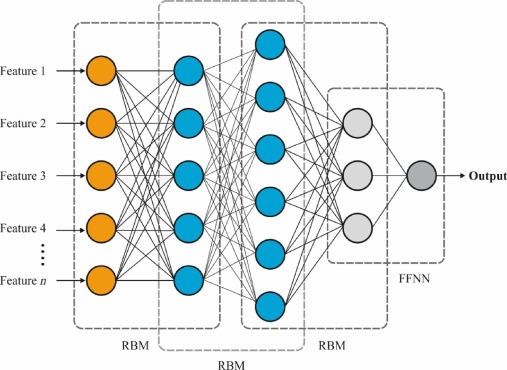

From the picture, it can be seen that DBN uses RBM and FFNN (ANN). As said in the early parts, DBN has two phases, which includes pre-training phase and fine-tuning phase. Pre-training phase is multiple layers of RBM (blue ones in the pictures) and fine-tuning phase is a FFNN (feed forward neural network). <br><br>

For the hidden layers structure (RBMs), we will use 256 neurons with activation function ReLu. The learning rate we will use for RBM is 0.05 and FFNN is 0.1. The number of epochs is 5 for both phases, and we will use a constant dropout rate of 0.2 for better results. 

In [14]:
from dbn import SupervisedDBNClassification
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=5,
                                         n_iter_backprop=5,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)

After defining our model, we can fit the training datasets to make the model.

In [15]:
classifier.fit(X_train_oh, y_train_le)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 6.285114
>> Epoch 2 finished 	RBM Reconstruction error 5.863731
>> Epoch 3 finished 	RBM Reconstruction error 5.640085
>> Epoch 4 finished 	RBM Reconstruction error 5.441661
>> Epoch 5 finished 	RBM Reconstruction error 5.287383
>> Epoch 1 finished 	RBM Reconstruction error 0.477537
>> Epoch 2 finished 	RBM Reconstruction error 0.246728
>> Epoch 3 finished 	RBM Reconstruction error 0.187492
>> Epoch 4 finished 	RBM Reconstruction error 0.158090
>> Epoch 5 finished 	RBM Reconstruction error 0.134988
[END] Pre-training step
[START] Fine tuning step:
>> Epoch 1 finished 	ANN training loss 1.930789
>> Epoch 2 finished 	ANN training loss 1.487000
>> Epoch 3 finished 	ANN training loss 1.359038
>> Epoch 4 finished 	ANN training loss 1.257182
>> Epoch 5 finished 	ANN training loss 1.169997
[END] Fine tuning step


SupervisedDBNClassification()

As we can see from the cell output, there are two phases of the model. The error values and the loss values of both are decreasing as the number of epochs increases. This means that the model will be better as the number of epochs or iterations increase. But, since we have limited RAM here, 5 is good enough.



### Performance Analysis on Testing Set

Our model has finished training, so we can now test the model on the testing dataset. We also want to see how well this model performs to do sentiment analysis on the testing dataset by analyzing the performance using accuracy, precision, f1, recall, and confusion matrix.<br><br>

First, we import the library needed, which is the sklearn metrics. Next, we can use `.predict` on the independent testing data to make the predicted sentiments. 

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test_oh)

We will compare the predicted sentiments to the actual sentiments (y_test_le), and see how accurate it is.

In [17]:
print('Done.\nAccuracy: %f' % accuracy_score(y_test_le, y_pred))

Done.
Accuracy: 0.850000


The accuracy that we managed to achieve is around 85%. This means that the mdoel is good enough for sentiment analysis and we can say that the result is satisfactory. Next, we want to see the confusion matrix to see how many corrects and wrongs we got in the comparison.

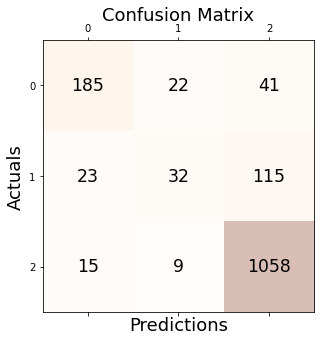

In [18]:
conf_matrix = confusion_matrix(y_test_le, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

The confusion matrix with the same classes (0-0, 1-1, 2-2) are the correctly predicted ones, and the rest are the incorrect ones. The numbers in each of that correct ones is larger than the other numbers, meaning that our model performs well. For precision, f1, and recall score, we will see the results based on each class because our target variabel is multiclass (3 classes).

In [19]:
precision_score(y_test_le, y_pred, average=None)

array([0.82959641, 0.50793651, 0.87149918])

The results for precision in each class:
* Class 0: 82.96% 
* Class 1: 50.79%
* Class 2: 87.15%

Precision is the ratio between the true positives and all the positives. It is counted like, for example class 0, 185/(185+23+15). It is the sum of true positives divided by the sum of true positives and false positives in each class.

In [20]:
recall_score(y_test_le, y_pred, average=None)

array([0.74596774, 0.18823529, 0.97781885])

The results for recall in each class:
* Class 0: 74.59% 
* Class 1: 18.82%
* Class 2: 97.78%

Recall is the measure of our model correctly identifying true positives. For example, class 0, it will be counted like 185/(185+22+41). It is the sum of true positives divided by the sum of true positives and false negatives.

In [21]:
f1_score(y_test_le, y_pred, average=None)

array([0.78556263, 0.27467811, 0.92160279])

The results for f1 in each class:
* Class 0: 78.55% 
* Class 1: 27.46%
* Class 2: 92.16%

F1 is the harmonic mean of both recall and precision. For example in class 0, the calculation would be like 185/(185+0.5*(23+15+22+41)). It is the sum of true positives divided by the sum of true positives and half the sum of false positives and false negatives.

### Conclusion

Our Deep Belief Network model reached an accuracy of 85%, meaning that the model is good for sentiment analysis. This number may increase since we only took a sample of 15000 rows from the actual dataset. However, the other metrics such as precision, recall, and f1, shows that the number in class 1 is low. This may happen because of imbalance in our 15000 sampled dataset. Overall, the model produces good result and we can say that we can predict the sentiment of a review with 85% accuracy.